In [34]:
import tensorflow.compat.v1 as tf
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)



Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [35]:
def w_variable(shape):
    init = tf.random_normal(shape,stddev=0.01)
    return tf.Variable(init)

def conv2d(x,w):
    return tf.nn.conv2d(x,w,strides= [1,1,1,1], padding='SAME')

def maxpool2(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')



In [36]:
tf.compat.v1.disable_eager_execution()



In [37]:
x = tf.compat.v1.placeholder(tf.float32, [None, 784])
y_ = tf.compat.v1.placeholder(tf.float32, [None, 10])

x_image= tf.reshape(x,[-1,28,28,1])

#convolucion1
w_conv1=w_variable([5,5,1,10])
b_conv1=w_variable([10])
h_conv1= tf.nn.relu(conv2d(x_image, w_conv1)+b_conv1)

#maxpooling1
h_pool1= maxpool2(h_conv1)
h_pool1_plat=tf.reshape(h_pool1,[-1,14*14*10])


#capa oculta1
w_1= w_variable([14*14*10, 400])
b_1=w_variable([400])
h_1=tf.nn.relu(tf.matmul(h_pool1_plat,w_1)+b_1)

#capa salida
w_2= w_variable([400, 10])
b_2=w_variable([10])
y= tf.nn.softmax(tf.matmul(h_1,w_2)+b_2)


#reducir error
mse= tf.reduce_mean(tf.square(y_ - y))
train_step= tf.train.AdamOptimizer(0.01).minimize(mse)



In [38]:
#iniciar session
sess= tf.Session()
sess.run(tf.initialize_all_variables())



In [39]:
 for i in range(350):
        batchX, batchY = mnist.train.next_batch(1000)
        sess.run(train_step, feed_dict= {x: batchX, y_: batchY })
        if(i%50==0):
            print("iteracion: "+str(i)+ "  train mse: "+str(sess.run(mse, feed_dict= {x: batchX, y_: batchY })))
            
print("entrenado")            

iteracion: 0  train mse: 0.089750975
iteracion: 50  train mse: 0.0060575493
iteracion: 100  train mse: 0.0039090333
iteracion: 150  train mse: 0.002211196
iteracion: 200  train mse: 0.001621304
iteracion: 250  train mse: 0.001131213
iteracion: 300  train mse: 0.0017823101
entrenado


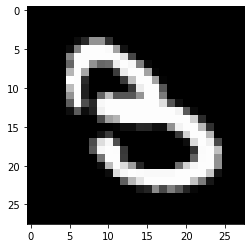

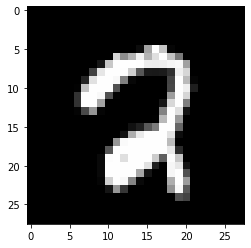

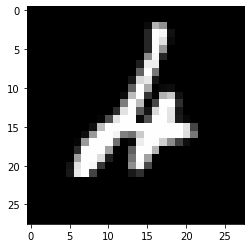

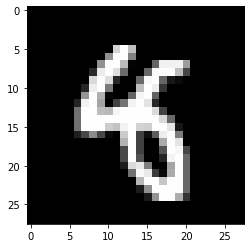

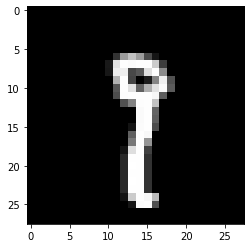

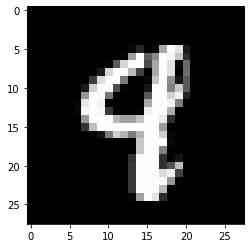

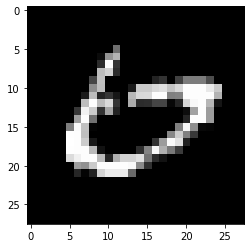

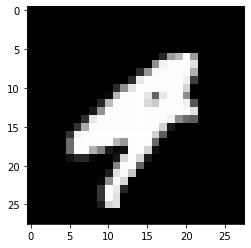

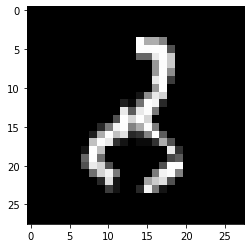

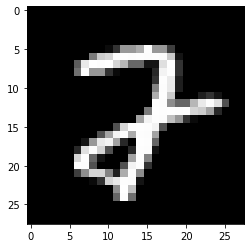

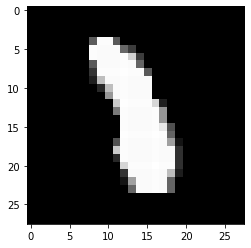

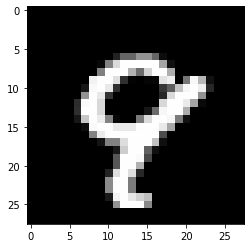

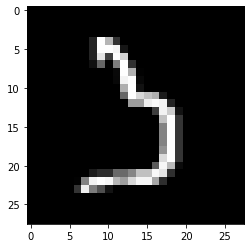

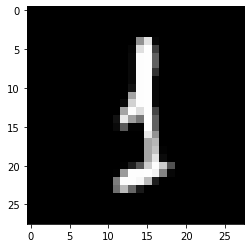

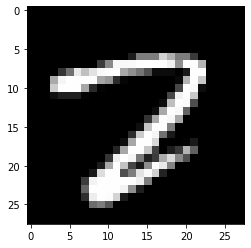

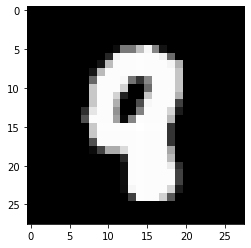

Test error:0.0144


In [41]:

pred= np.argmax(sess.run(y, feed_dict={x:mnist.test.images, y_: mnist.test.labels}), axis=1)

truelabels=np.argmax(mnist.test.labels, axis=1)

errors=0

for i in range(pred.shape[0]):
    if(pred[i]!= truelabels[i]):
        if(i<1000):
            plt.imshow(mnist.test.images[i].reshape(28,28),cmap='gray')
            plt.show()
        errors=errors+1
print("Test error:"+ str(errors/pred.shape[0]))